# Final model output

In [1]:
import os

os.chdir("../..")

In [2]:
!pwd

/Users/wiktorlazarski/Desktop/my_project/head-segmentation


In [3]:
import head_segmentation.constants as C
import head_segmentation.model as mdl
import head_segmentation.image_processing as ip

import scripts.training.data_loading as dl

import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 12)
plt.rcParams["image.cmap"] = "gray"
plt.rcParams['savefig.facecolor'] = "white"

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
preprocessing_pipeline = ip.PreprocessingPipeline(nn_image_input_resolution=512)

model = mdl.HeadSegmentationModel.load_from_checkpoint(ckpt_path=C.HEAD_SEGMENTATION_MODEL_PATH)
model.eval()

print("Model loaded")

Model loaded


In [5]:
import cv2
img = cv2.imread("2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

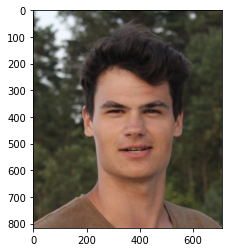

In [6]:
plt.imshow(img)

In [7]:
preprocessed_image = preprocessing_pipeline.preprocess_image(img)
preprocessed_image = preprocessed_image.unsqueeze(0)
preprocessed_image.shape

torch.Size([1, 3, 512, 512])

In [8]:
mdl_out = model(preprocessed_image)
mdl_out.shape

torch.Size([1, 2, 512, 512])

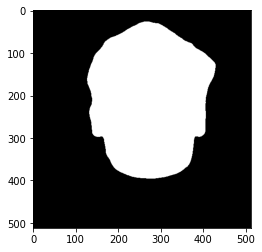

In [9]:
plt.imshow(mdl_out.argmax(dim=1).squeeze().numpy())

In [10]:
def postprocess(out, original_img_shape):
    out = out.squeeze()
    out = out.argmax(dim=0)
    out = out.numpy().astype(np.uint8)
    postprocessed = cv2.resize(out, original_img_shape, interpolation=cv2.INTER_NEAREST)
    
    return postprocessed

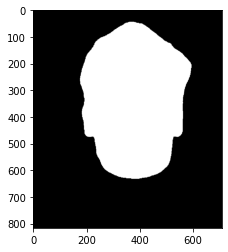

In [11]:
h, w = img.shape[:2]
pred_segmap = postprocess(mdl_out, original_img_shape=(w, h))
plt.imshow(pred_segmap)

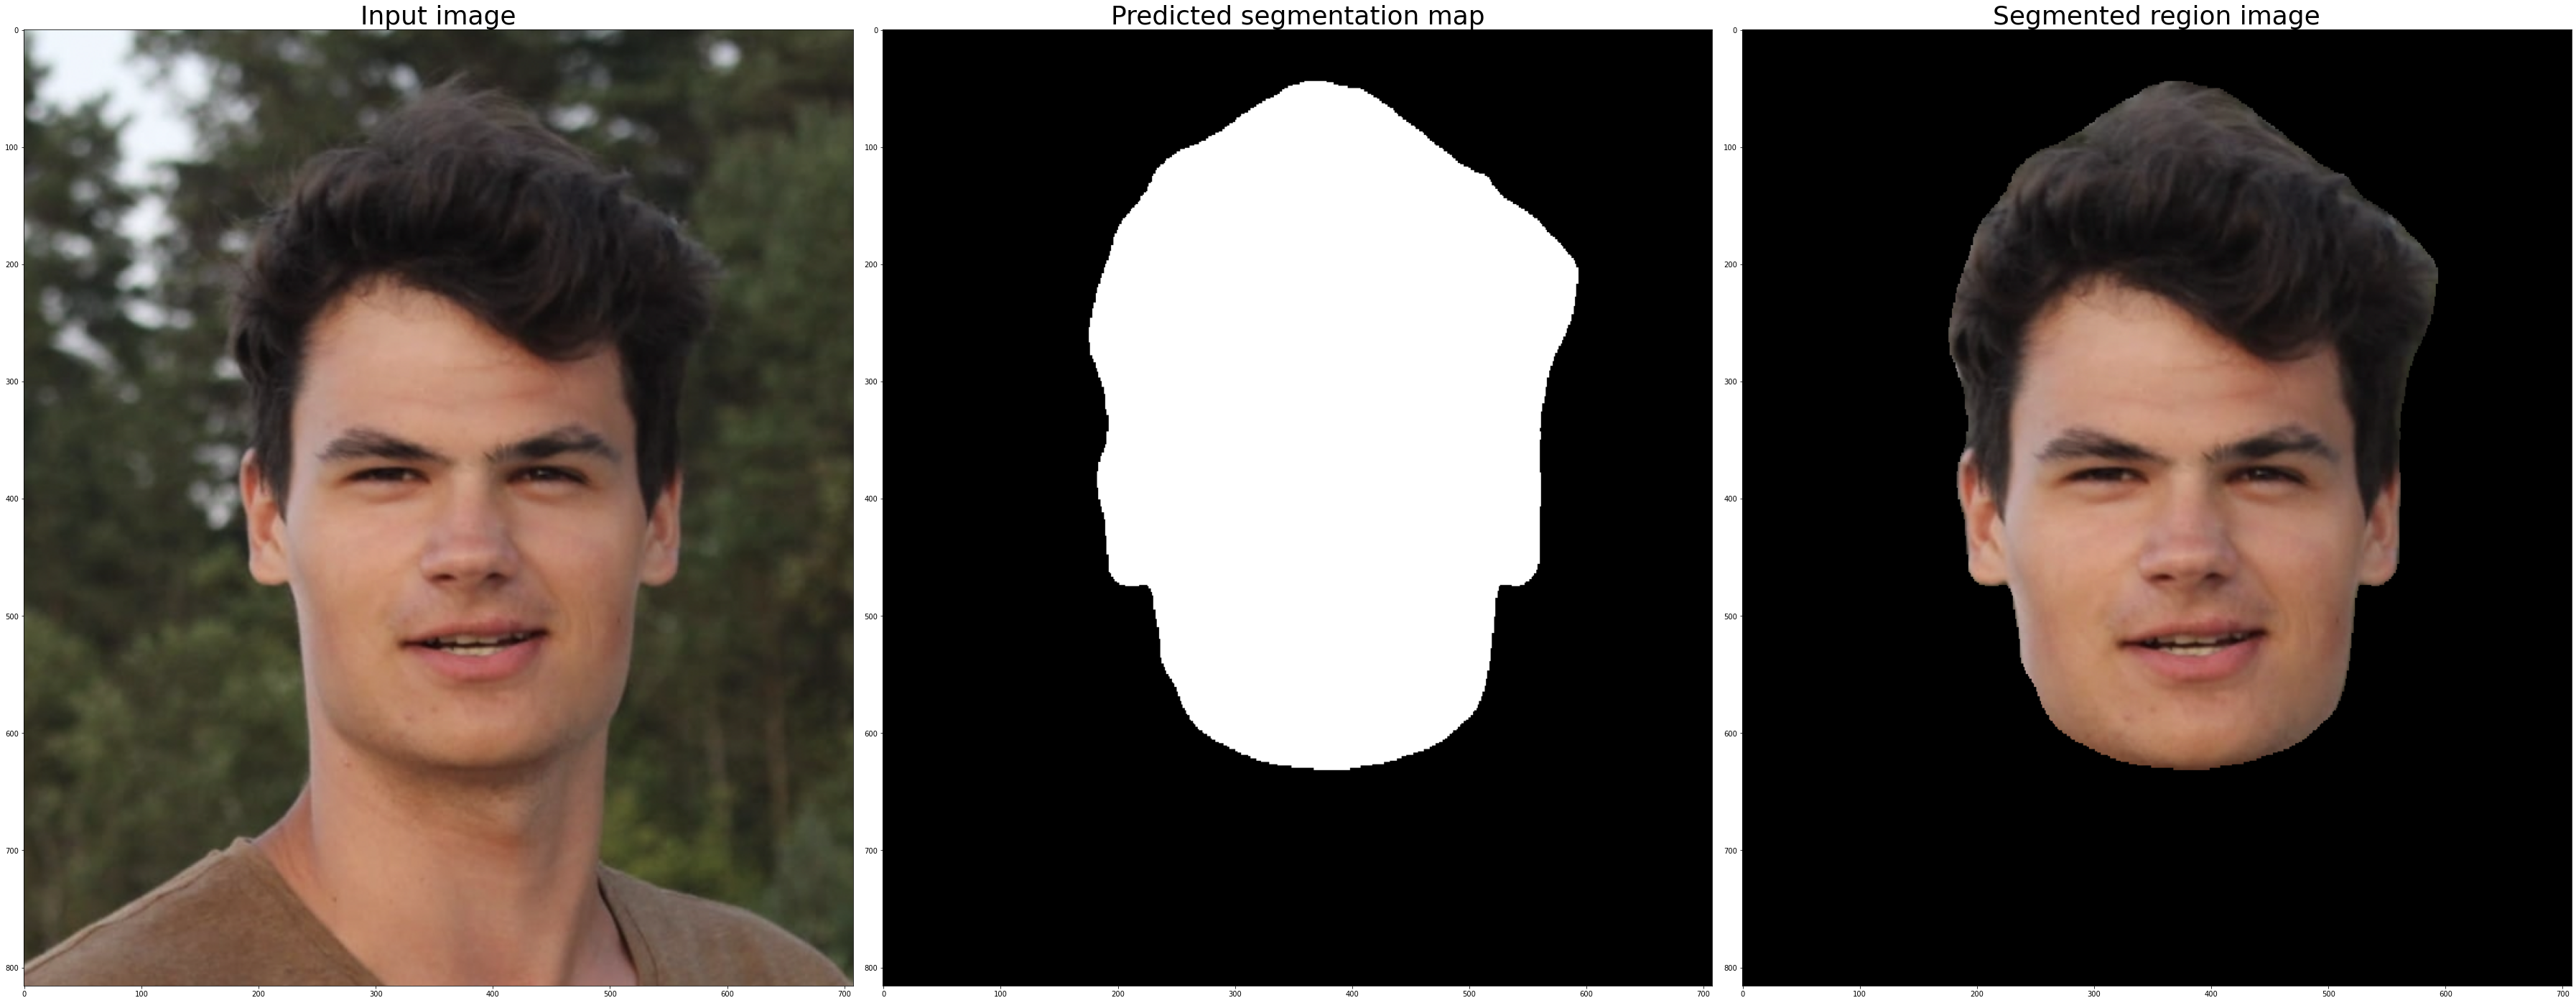

In [12]:
segmented_region = np.zeros(img.shape, dtype=np.uint8)
segmented_region[pred_segmap == 1] = img[pred_segmap == 1]

f, ax = plt.subplots(1, 3, figsize=(50, 20))
f.tight_layout()

fontsize = 36

ax[0].imshow(img)
ax[0].set_title("Input image", fontsize=fontsize)

ax[1].imshow(pred_segmap)
ax[1].set_title("Predicted segmentation map", fontsize=fontsize)

ax[2].imshow(segmented_region)
ax[2].set_title("Segmented region image", fontsize=fontsize)

plt.savefig("out.png")
plt.show()